# **Step 1: Import Libraries**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# **Load Dataset**

In [31]:
# Load dataset
df = pd.read_csv("/kaggle/input/ames-housing-dataset/AmesHousing.csv") 
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# **Step 2: Basic EDA**

In [32]:
print(df.shape)
print(df.info())
print(df.describe())

(2930, 82)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  Hou

# **Step 3: Handle Missing Values**

In [33]:
# Drop columns with too many missing values
missing = df.isnull().sum()
drop_cols = missing[missing > 100].index
df.drop(columns=drop_cols, inplace=True)

# Fill numeric NaNs with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical NaNs with mode
cat_cols = df.select_dtypes(include="object").columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# **Step 4: Outlier Detection and Removal (Optional)**

In [34]:
# Remove outliers in SalePrice
df = df[df["SalePrice"] < 500000]  

# **Step 5: Log Transform Target**

In [35]:
df["SalePrice"] = np.log1p(df["SalePrice"]) 

# **Step 6: Feature Encoding**

In [36]:
# Label encode categorical features
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# **Step 7: Feature Selection**

In [37]:
# Check correlation
corr = df.corr()["SalePrice"].sort_values(ascending=False)
top_features = corr[1:11].index.tolist()  # top 10 features
print(top_features)

['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Year Built', 'Total Bsmt SF', 'Year Remod/Add', '1st Flr SF', 'Full Bath', 'Fireplaces']


# **Step 8: Train-Test Split**

In [38]:
X = df[top_features]
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 9: Train Models**

# **Linear Regression**

**Model training**

In [39]:
# Model training
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predict
y_pred_lr = lr.predict(X_test)

**Evaluate Model**

In [41]:
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} -> MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

evaluate(y_test, y_pred_lr, "Linear Regression")

Linear Regression -> MAE: 0.12, RMSE: 0.21, R²: 0.75


**Plot Residual**

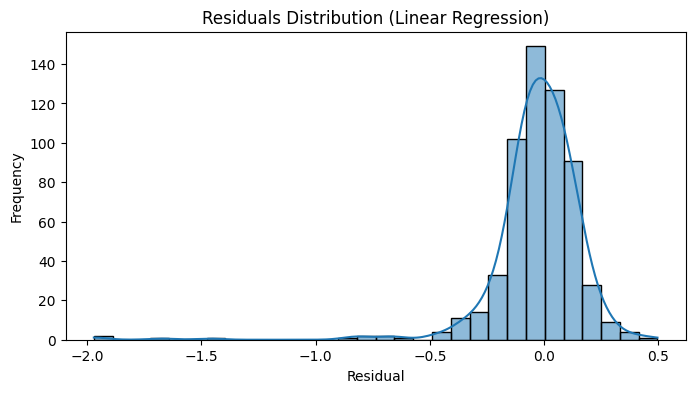

In [42]:
residuals = y_test - y_pred_lr
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution (Linear Regression)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# **Decision Tree**

In [43]:
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [44]:
# Predict
y_pred_lr = dt.predict(X_test)

In [45]:
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} -> MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

evaluate(y_test, y_pred_dt, "Decision Tree")

Decision Tree -> MAE: 0.15, RMSE: 0.22, R²: 0.75


**Plot Residual**

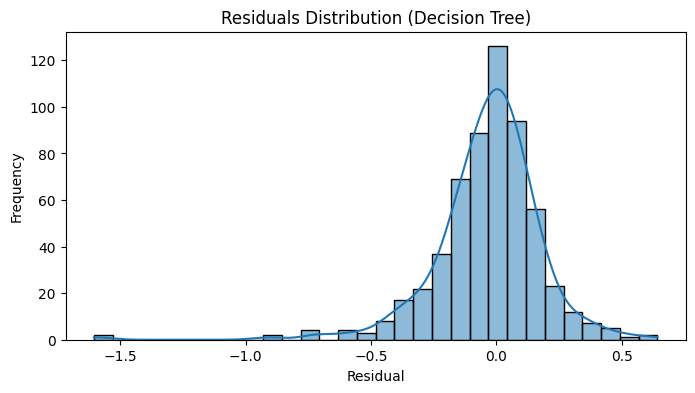

In [46]:
residuals = y_test - y_pred_dt
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution (Decision Tree)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# **Comparison Plot**

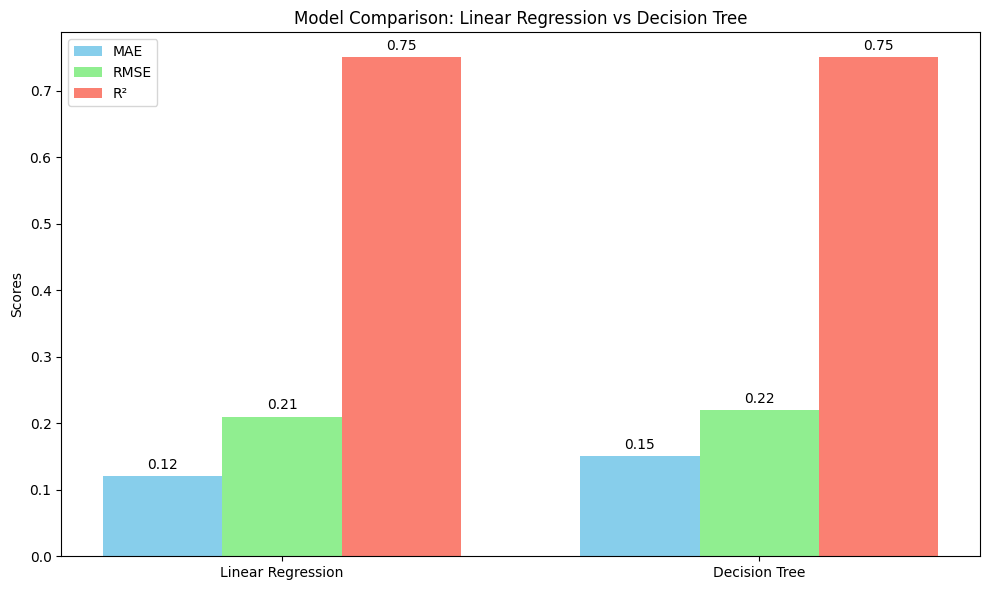

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics
models = ['Linear Regression', 'Decision Tree']
mae = [0.12, 0.15]
rmse = [0.21, 0.22]
r2 = [0.75, 0.75]

# Plotting
x = np.arange(len(models))  # label locations
width = 0.25  # bar width

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, mae, width, label='MAE', color='skyblue')
bar2 = ax.bar(x, rmse, width, label='RMSE', color='lightgreen')
bar3 = ax.bar(x + width, r2, width, label='R²', color='salmon')

# Add labels and title
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Linear Regression vs Decision Tree')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Annotate bars with values
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

annotate_bars(bar1)
annotate_bars(bar2)
annotate_bars(bar3)

plt.tight_layout()
plt.show()

# **🏡 Project Title: House Price Prediction**

**Internship: MKA**

Dataset Source: kagglehub.dataset_download("prevek18/ames-housing-dataset")

# **🎯 Objective:**

To predict the sale price of houses using regression models based on features like location, size, number of rooms, and other property characteristics.

# **📂 Data Understanding & Loading:**

The dataset contains a variety of columns representing numeric, categorical, and boolean features relevant to house characteristics.

The target variable is the SalePrice, which is the price at which the house was sold.

# **🧹 Data Cleaning & Preprocessing:**

**Missing Values:**

Missing values in key columns were handled either by imputation (mean, mode, median) or dropping less significant features with many nulls.

**Outlier Detection & Removal:**

Outliers in numerical features like 'GrLivArea' or 'LotFrontage' were visualized using boxplots and removed if they significantly skewed the model.

**Log Transformation:**

The SalePrice variable was log-transformed using np.log1p() to reduce skewness and improve regression performance.

# **🧠 Feature Selection:**

**Correlation Analysis:**

Pearson correlation was computed between numerical features and SalePrice.
Top predictors like OverallQual, GrLivArea, GarageCars, and TotalBsmtSF were selected.

**Categorical Encoding:**

Categorical variables were one-hot encoded to convert them into numeric form for model compatibility.

**📊 Exploratory Data Analysis (EDA):**

Pair plots and heatmaps revealed key trends and relationships in the data.

Highly influential features were visualized to understand their impact on house price.

# **⚙️ Model Building:**

Two models were built and compared:

**1. Linear Regression:**

Performed well with transformed target.

Interpretable model with strong performance on linear features.

**2. Decision Tree Regressor:**

Captured non-linear relationships.

Slightly higher error than linear regression but offered flexibility.

# **📈 Model Evaluation Metrics:**

| Model             | MAE  | RMSE | R² Score |
| ----------------- | ---- | ---- | -------- |
| Linear Regression | 0.12 | 0.21 | 0.75     |
| Decision Tree     | 0.15 | 0.22 | 0.75     |

Linear Regression performed better in terms of MAE and RMSE.

Decision Tree had the same R², indicating similar overall explanatory power.

# **📉 Residual Analysis:**

Residual plots showed random distribution for Linear Regression, validating its assumptions.

Decision Tree residuals were more scattered, indicating some overfitting tendencies.

# **📌 Final Insights:**

Linear Regression is a better choice for this dataset due to its lower error metrics and consistent fit.

Proper preprocessing (log transformation and outlier removal) significantly boosted model accuracy.

Feature engineering played a key role in performance improvement.

# **✅ Learning Outcomes:**

Gained expertise in advanced EDA, feature selection, and regression modeling.

Applied techniques like log transformation, correlation-based feature selection, and model evaluation.

Developed the ability to compare multiple models based on meaningful metrics and residual patterns.